In [14]:
# IMPORT LIBRARY
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
# MEMUAT LOAD DATA
df = pd.read_csv('Online_Retail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# MENAMPILKAN INFO DATAFRAME
df.info(),
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(541909, 8)

In [22]:
# CEK MISSING VALUE
missing_value = df.isnull().sum()
print("Missing Values:\n", missing_value)

Missing Values:
 InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalPrice      0
HighPurchase    0
dtype: int64


In [7]:
# MENGHAPUS BARIS YANG MEMILIKI MISSING VALUE
df = df.dropna()

# MENGHAPUS DUPLICATE
df = df.drop_duplicates()

# MENGUBAH INVOICE DATE MENJADI DATETIME
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\62822\AppData\Local\Temp\ipykernel_14236\1717358457.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# CLUSTERING DATA (KMEANS)
df_sample = df.sample(45000, random_state=42)
cluster_df = df_sample[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(cluster_scaled)
cluster_df['Cluster'] = kmeans_labels

C:\Users\62822\AppData\Local\Temp\ipykernel_14236\1239246197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans_labels


In [10]:
# EVALUASI MODEL CLUSTERING
sil_score = silhouette_score(cluster_scaled, kmeans_labels)
print(f'silhouette_score(sample): {sil_score * 100:.2f}%')

silhouette_score(sample): 99.93%


In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
threshold = df['TotalPrice'].median()
df['HighPurchase'] = df['TotalPrice'].apply(lambda x: 1 if x > threshold else 0)

In [12]:
# CLASSIFICATION DATA
classification_df = df[['Quantity', 'UnitPrice', 'TotalPrice', 'HighPurchase']]. sample(20000, random_state=42)

In [18]:
# Buat target klasifikasi berdasarkan ambang batas (threshold)
threshold = df['TotalPrice'].quantile(0.75)  # misalnya ambil kuartil ke-3
df['HighPurchase'] = df['TotalPrice'].apply(lambda x: 1 if x > threshold else 0)

# Siapkan data klasifikasi
classification_df = df[['Quantity', 'UnitPrice', 'TotalPrice', 'HighPurchase']]
X = classification_df[['Quantity', 'UnitPrice']]
y = classification_df['HighPurchase']

# Split & klasifikasikan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[61699     1]
 [    1 18620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61700
           1       1.00      1.00      1.00     18621

    accuracy                           1.00     80321
   macro avg       1.00      1.00      1.00     80321
weighted avg       1.00      1.00      1.00     80321



In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,HighPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [20]:
# AKURASI DATA
accuracy = clf.score(X_test, y_test)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

Akurasi Model: 100.00%


[0.64179469 0.33321861]


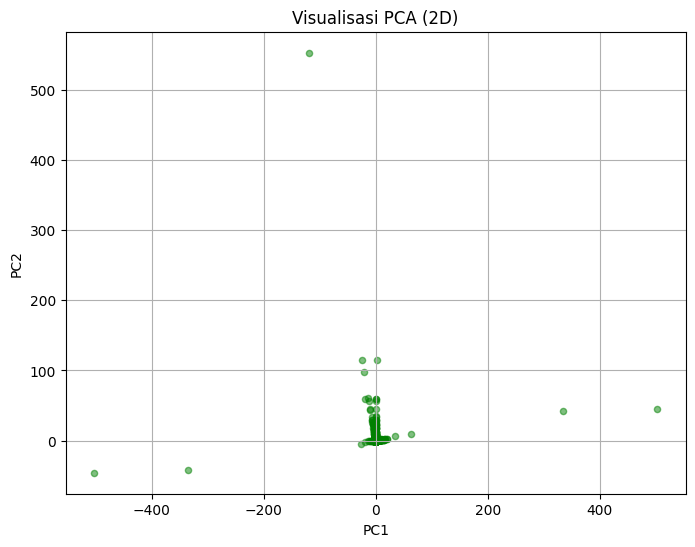

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Quantity','UnitPrice', 'TotalPrice']])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

# Tampilkan varians yang dijelaskan oleh setiap komponen
print(pca.explained_variance_ratio_)

# Ubah array hasil PCA ke DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='green', s=20)
plt.title('Visualisasi PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()